# ***Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from images , enabling intuitive human-computer interaction and gesture-based control systems.***

In this model we try to accurately identify the hand gestures . The major steps involved are :-

*   Uploading Kaggle Dataset
*   Importing the Libraries
*   Shuffling the input data
*   Predicting few new results
*   Normalizing the Data
*   One Hot Encoding
*   Reshaping the Data
*   Splitting the dataset into Training Set and Test Set
*   Graph between "Epochs" vs "Loss"
*   Graph between "Epochs" vs "Accuracy"
*   Test Accuracy
*   Confusion Matrix











# **Step 1 : Uploading Kaggle Dataset**

In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gti-upm/leapgestrecog")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/leapgestrecog


In [16]:
!pip install kaggle


In [17]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

# Download dataset
!kaggle datasets download -d gti-upm/leapgestrecog

# Unzip
!unzip -q leapgestrecog.zip -d leap_data


Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
leapgestrecog.zip: Skipping, found more recently modified local copy (use --force to force download)
replace leap_data/leapGestRecog/00/01_palm/frame_00_01_0001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# **Step 2 : Importing the Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
CATEGORIES = ['01_palm','02_l','03_fist','04_fist_moved',
              '05_thumb','06_index','07_ok','08_palm_moved',
              '09_c','10_down']
IMG_SIZE = 50

# ✅ Correct path for Colab
data_path = "/content/leap_data/leapGestRecog"

image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass

print("Loaded images:", len(image_data))


Loaded images: 20000


# **Step 3 : Shuffling the input data**

In [ ]:

import random
random.shuffle(image_data)

In [ ]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)


In [ ]:
label[:20]

[6, 5, 7, 5, 6, 1, 0, 9, 9, 0, 0, 3, 2, 9, 8, 1, 5, 9, 4, 5]

# **Step 4 : Predicting few new results**

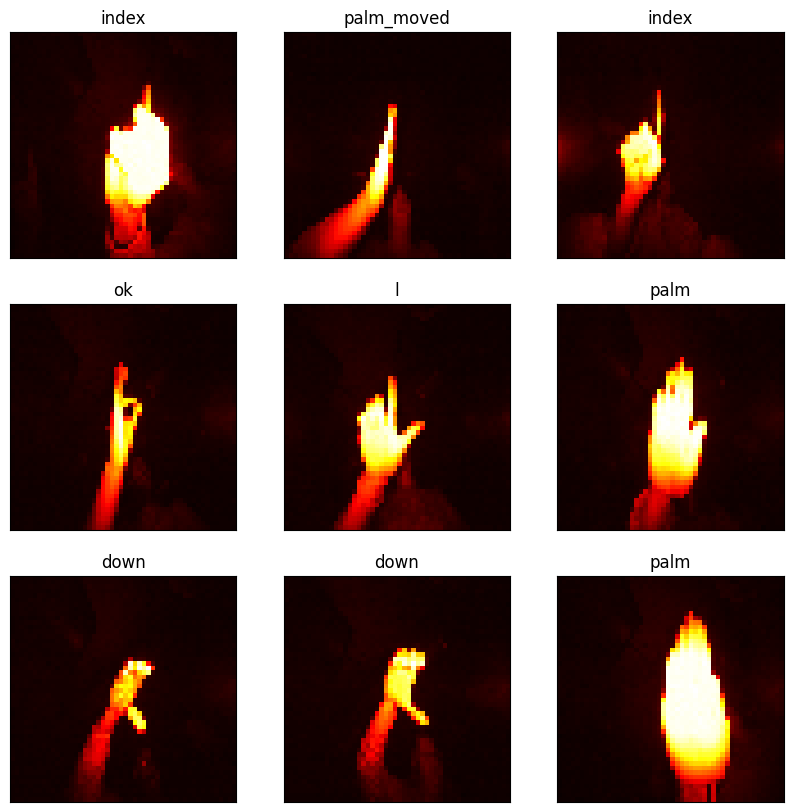

In [ ]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

# **Step 5 : Normalizing the Data**

In [ ]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

# **Step 6 : One Hot Encoding**

In [ ]:
from tensorflow.keras.utils import to_categorical

# one hot encoding
label = to_categorical(label, num_classes=10)
label[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

# **Step 7 : Reshaping the Data**

In [ ]:

input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

# **Step 8 : Splitting the dataset into Training Set and Test Set**

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

# ***THE MODEL***

In [ ]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 113s 248ms/step - accuracy: 0.7098 - loss: 0.8596 - val_accuracy: 0.9932 - val_loss: 0.0213
Epoch 2/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 139s 242ms/step - accuracy: 0.9948 - loss: 0.0186 - val_accuracy: 0.9990 - val_loss: 0.0033
Epoch 3/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 106s 242ms/step - accuracy: 0.9978 - loss: 0.0074 - val_accuracy: 0.9993 - val_loss: 0.0016
Epoch 4/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 141s 240ms/step - accuracy: 0.9985 - loss: 0.0045 - val_accuracy: 0.9980 - val_loss: 0.0050
Epoch 5/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 104s 238ms/step - accuracy: 0.9993 - loss: 0.0021 - val_accuracy: 0.9993 - val_loss: 0.0026
Epoch 6/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 143s 241ms/step - accuracy: 0.9979 - loss: 0.0061 - val_accuracy: 0.9997 - val_loss: 0.0014
Epoch 7/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 142s 241ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9995 - val_loss: 0.0035


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,338,582 (12.74 MB)

 Trainable params: 1,669,290 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,669,292 (6.37 MB)

# **Step 9 : Graph between "Epochs" vs "Loss"**

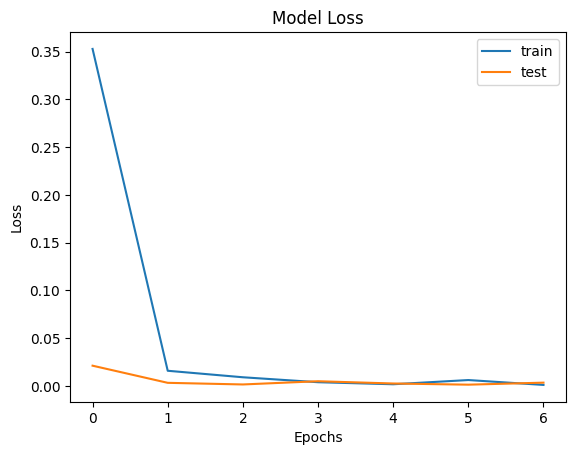

In [18]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# **Step 10 : Graph between "Epochs" vs "Accuracy"**

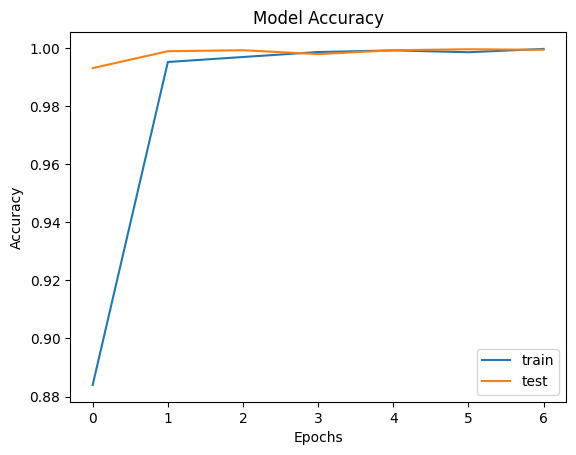

In [19]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# **Step 11 : Test Accuracy**

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.9996 - loss: 0.0030
Test accuracy: 99.95%


# **Step 12 : Confusion Matrix**

188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step


[]

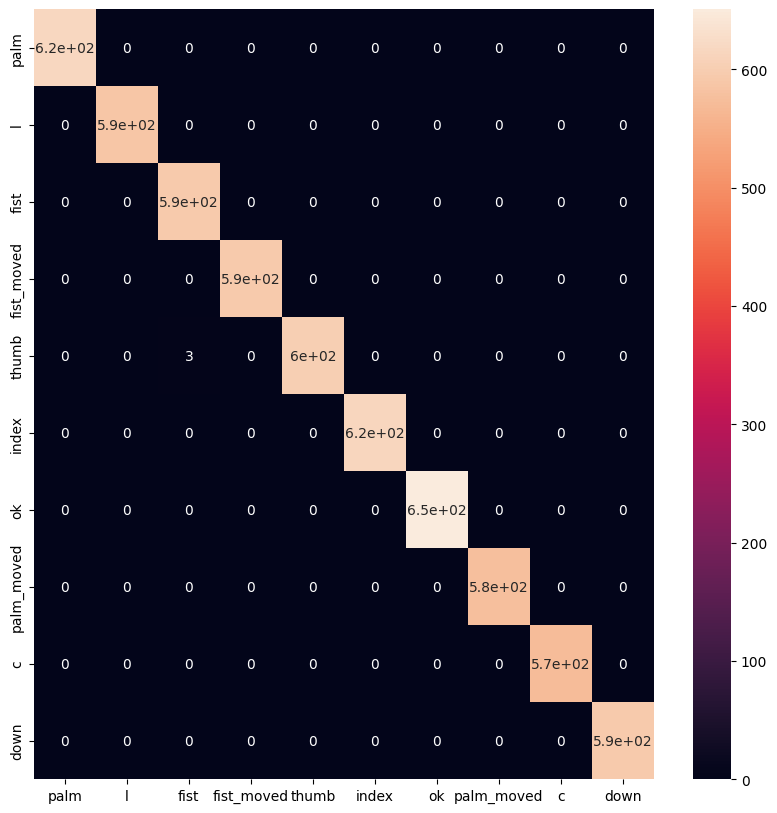

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()